Sešit pro prozkoumávání prvních vyfiltrovaných dat z České národní bibliografie.

In [864]:
import os
import re
import sys
import json
import pandas as pd

In [865]:
pd.set_option('display.max_columns', 1000)

In [866]:
df = pd.read_json('data_raw/ceska_beletrie_raw.json')
df = df.reindex(sorted(df.columns), axis=1)
# cizojazycne = df[(df['041_a'].notnull()) & (df['041_a'] != 'cze')]

C:\Users\micha\AppData\Local\Temp\ipykernel_1380\1481971476.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json('data_raw/ceska_beletrie_raw.json')
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\1481971476.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json('data_raw/ceska_beletrie_raw.json')
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\1481971476.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is depreca

In [867]:
testy = pd.read_json("data_raw/testy.json")

C:\Users\micha\AppData\Local\Temp\ipykernel_1380\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  testy = pd.read_json("data_raw/testy.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  testy = pd.read_json("data_raw/testy.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_1380\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future ver

In [895]:
def najdi_rok(pole008, c260, c264):
    if " xr" in pole008:
        try:
            vysledek = int(pole008.split(' xr')[0].strip()[-4:])
            return vysledek
        except:
            pass
    retezec = str([c260, c264])
    try:
        vysledek = int(re.search(r'\d{4}',retezec).group())
        return vysledek
    except:
        return None

In [990]:
df['260_e']

0        [(Vimperk :]
1        [(Vimperk :]
2        [(Vimperk :]
3        [(Vimperk :]
4         [(Blatná :]
             ...     
76429             NaN
76430             NaN
76431             NaN
76432             NaN
76433             NaN
Name: 260_e, Length: 76434, dtype: object

In [869]:
df['rok'] = df.apply(lambda row: najdi_rok(row['008'], row['260_c'], row['264_c']), axis=1)

[['1983'], nan], 1983
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1982'], nan], 1982
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1982-1983'], nan], 1982
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1983'], nan], 1983
[['1983'], nan], 1983
[nan, ['1983']], 1983
[['1983'], nan], 1983
[['1982'], nan], 1982
[['1982'], nan], 1982
[['1983'], nan], 1983
[['1982'], nan], 1982
[['1982'], nan], 1982
[['[1982]'], nan], 1982
[['1982'], nan], 1982
[['1981'], nan], 1981
[['

In [952]:
df[['072_x','655_a']].sample(20)

,072_x,655_a
68312,[Česká próza],"[české romány, historické romány, Czech fictio..."
62462,[Fotografie. Fotografické postupy],"[česká poezie, fotografické publikace, Czech p..."
38747,[Česká próza],"[české povídky, antologie, Czech short stories..."
69868,"[Česká próza, Literatura pro děti a mládež (be...","[české příběhy, humoristické příběhy, publikac..."
9623,"[Česká próza, Literatura pro děti a mládež (be...","[české pohádky, publikace pro děti]"
45666,"[Geografie Česka a Slovenska, reálie, cestování]","[česká poezie, brožury, fotografické publikace..."
2656,"[Česká próza, Literatura pro děti a mládež (be...","[české pohádky, publikace pro děti]"
39213,"[Česká próza, Literatura pro děti a mládež (be...","[české pohádky, publikace pro děti, Czech fair..."
12011,[Česká próza],"[české prózy, humoristické scénky, humoristick..."
19236,"[Česká próza, Literatura pro děti a mládež (be...","[příběhy, publikace pro děti, Short stories, C..."


In [960]:
df[df['245_a'].str.contains('babi',na=False)]

,001,003,005,006,007,008,010_a,015_a,015_z,020_a,020_c,020_q,020_z,022_a,022_z,024_a,024_ind1,024_ind2,024_q,024_z,028_a,028_b,028_ind1,028_ind2,028_q,035_a,040_9,040_a,040_b,040_c,040_d,040_e,041_a,041_b,041_d,041_e,041_g,041_h,041_ind1,041_k,043_2,043_a,043_b,044_a,045_a,047_a,048_a,048_b,072_2,072_9,072_a,072_ind2,072_x,080_2,080_9,080_a,100_4,100_7,100_a,100_b,100_c,100_d,100_ind1,100_q,110_4,110_7,110_a,110_b,110_ind1,111_4,111_7,111_a,111_c,111_d,111_e,111_ind1,111_n,130_7,130_a,130_g,130_ind1,130_l,130_p,210_a,210_b,210_ind1,222_a,222_b,222_ind2,240_7,240_a,240_ind1,240_ind2,240_k,240_l,240_n,245_a,245_b,245_c,245_h,245_ind1,245_ind2,245_n,245_p,246_a,246_b,246_f,246_i,246_ind1,246_ind2,246_n,246_p,250_a,250_b,256_a,260_3,260_a,260_b,260_c,260_e,260_f,260_g,260_ind1,264_3,264_a,264_b,264_c,264_ind1,264_ind2,300_a,300_b,300_c,300_e,300_f,306_a,310_a,310_b,321_a,321_b,336_2,336_a,336_b,337_2,337_a,337_b,338_2,338_a,338_b,340_2,340_a,344_2,344_a,344_b,344_c,344_g,347_2,347_a,347_b,362_a,362_ind1,382_a,382_b,382_ind1,382_ind2,382_n,382_s,382_v,490_3,490_a,490_ind1,490_v,490_x,500_4,500_5,500_a,501_5,501_a,504_a,505_a,505_g,505_ind1,505_ind2,505_r,505_t,508_a,511_a,511_ind1,516_a,518_3,518_a,518_d,518_o,518_p,520_a,520_b,520_ind1,521_a,521_ind1,525_a,530_a,538_a,546_a,550_a,562_a,563_5,563_a,580_a,588_5,588_a,600_2,600_7,600_a,600_b,600_c,600_d,600_ind1,600_ind2,600_l,600_q,600_t,600_x,610_2,610_7,610_a,610_b,610_ind1,610_ind2,611_2,611_7,611_a,611_c,611_d,611_ind1,611_ind2,611_n,630_2,630_7,630_a,630_d,630_ind1,630_ind2,630_l,630_p,648_2,648_7,648_a,648_ind2,650_2,650_7,650_a,650_ind1,650_ind2,650_x,650_y,650_z,651_2,651_7,651_a,651_ind2,651_x,651_y,651_z,653_a,653_ind1,655_2,655_7,655_a,655_ind1,655_ind2,655_x,700_4,700_7,700_a,700_b,700_c,700_d,700_e,700_f,700_i,700_ind1,700_ind2,700_k,700_l,700_m,700_o,700_q,700_s,700_t,710_4,710_7,710_a,710_b,710_c,710_d,710_ind1,711_4,711_7,711_a,711_c,711_d,711_e,711_ind1,711_n,730_7,730_a,730_i,730_ind1,730_ind2,730_l,730_p,740_a,740_h,740_ind1,740_ind2,740_n,752_a,752_c,765_9,765_i,765_ind1,765_ind2,765_n,765_t,770_ind1,770_t,772_g,772_i,772_ind1,772_ind2,772_t,772_x,776_i,776_ind1,776_ind2,776_t,776_x,776_z,780_ind1,780_ind2,780_t,785_a,785_ind1,785_ind2,785_t,787_a,787_b,787_d,787_g,787_h,787_i,787_ind1,787_ind2,787_s,787_t,787_x,787_z,800_a,800_b,800_d,800_ind1,800_p,800_q,800_t,810_a,810_b,810_d,810_ind1,810_p,810_t,830_a,830_ind2,830_n,830_p,830_s,830_v,856_3,856_4,856_ind1,856_ind2,856_q,856_u,856_y,856_z,902_a,902_q,902_z,925_a,925_b,926_a,926_b,928_a,928_ind1,929_a,930_a,964_a,968_a,969_a,970_a,979_a,979_i,979_j,979_n,979_x,998_a,rok,stránek


In [946]:
df.sample(30)

,001,003,005,006,007,008,010_a,015_a,015_z,020_a,020_c,020_q,020_z,022_a,022_z,024_a,024_ind1,024_ind2,024_q,024_z,028_a,028_b,028_ind1,028_ind2,028_q,035_a,040_9,040_a,040_b,040_c,040_d,040_e,041_a,041_b,041_d,041_e,041_g,041_h,041_ind1,041_k,043_2,043_a,043_b,044_a,045_a,047_a,048_a,048_b,072_2,072_9,072_a,072_ind2,072_x,080_2,080_9,080_a,100_4,100_7,100_a,100_b,100_c,100_d,100_ind1,100_q,110_4,110_7,110_a,110_b,110_ind1,111_4,111_7,111_a,111_c,111_d,111_e,111_ind1,111_n,130_7,130_a,130_g,130_ind1,130_l,130_p,210_a,210_b,210_ind1,222_a,222_b,222_ind2,240_7,240_a,240_ind1,240_ind2,240_k,240_l,240_n,245_a,245_b,245_c,245_h,245_ind1,245_ind2,245_n,245_p,246_a,246_b,246_f,246_i,246_ind1,246_ind2,246_n,246_p,250_a,250_b,256_a,260_3,260_a,260_b,260_c,260_e,260_f,260_g,260_ind1,264_3,264_a,264_b,264_c,264_ind1,264_ind2,300_a,300_b,300_c,300_e,300_f,306_a,310_a,310_b,321_a,321_b,336_2,336_a,336_b,337_2,337_a,337_b,338_2,338_a,338_b,340_2,340_a,344_2,344_a,344_b,344_c,344_g,347_2,347_a,347_b,362_a,362_ind1,382_a,382_b,382_ind1,382_ind2,382_n,382_s,382_v,490_3,490_a,490_ind1,490_v,490_x,500_4,500_5,500_a,501_5,501_a,504_a,505_a,505_g,505_ind1,505_ind2,505_r,505_t,508_a,511_a,511_ind1,516_a,518_3,518_a,518_d,518_o,518_p,520_a,520_b,520_ind1,521_a,521_ind1,525_a,530_a,538_a,546_a,550_a,562_a,563_5,563_a,580_a,588_5,588_a,600_2,600_7,600_a,600_b,600_c,600_d,600_ind1,600_ind2,600_l,600_q,600_t,600_x,610_2,610_7,610_a,610_b,610_ind1,610_ind2,611_2,611_7,611_a,611_c,611_d,611_ind1,611_ind2,611_n,630_2,630_7,630_a,630_d,630_ind1,630_ind2,630_l,630_p,648_2,648_7,648_a,648_ind2,650_2,650_7,650_a,650_ind1,650_ind2,650_x,650_y,650_z,651_2,651_7,651_a,651_ind2,651_x,651_y,651_z,653_a,653_ind1,655_2,655_7,655_a,655_ind1,655_ind2,655_x,700_4,700_7,700_a,700_b,700_c,700_d,700_e,700_f,700_i,700_ind1,700_ind2,700_k,700_l,700_m,700_o,700_q,700_s,700_t,710_4,710_7,710_a,710_b,710_c,710_d,710_ind1,711_4,711_7,711_a,711_c,711_d,711_e,711_ind1,711_n,730_7,730_a,730_i,730_ind1,730_ind2,730_l,730_p,740_a,740_h,740_ind1,740_ind2,740_n,752_a,752_c,765_9,765_i,765_ind1,765_ind2,765_n,765_t,770_ind1,770_t,772_g,772_i,772_ind1,772_ind2,772_t,772_x,776_i,776_ind1,776_ind2,776_t,776_x,776_z,780_ind1,780_ind2,780_t,785_a,785_ind1,785_ind2,785_t,787_a,787_b,787_d,787_g,787_h,787_i,787_ind1,787_ind2,787_s,787_t,787_x,787_z,800_a,800_b,800_d,800_ind1,800_p,800_q,800_t,810_a,810_b,810_d,810_ind1,810_p,810_t,830_a,830_ind2,830_n,830_p,830_s,830_v,856_3,856_4,856_ind1,856_ind2,856_q,856_u,856_y,856_z,902_a,902_q,902_z,925_a,925_b,926_a,926_b,928_a,928_ind1,929_a,930_a,964_a,968_a,969_a,970_a,979_a,979_i,979_j,979_n,979_x,998_a,rok,stránek
48387,[nkc20132448999],[CZ PrNK],[20130725084539.0],NaN,[ta],[130327s2013 xr a g 000 p cze],NaN,[cnb002448999],NaN,[978-80-260-4157-3],NaN,[(brož.)],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[(OCoLC)855464103],NaN,[OLA001],[cze],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Konspekt],[25],[821.162.3-1],[7],[Česká poezie],"[MRF, MRF, MRF]",NaN,"[821.162.3-1, (0:82-141), (0:82-14)]",[aut],[mzk2009534003],"[Bureš, Jiří,]",NaN,NaN,[1944-2019],[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Lamentace poutníka /],NaN,[Jiří Bureš ; [fotografie Jindřich Štreit]],NaN,[1],[0],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1. vyd.],NaN,NaN,NaN,[[Olomouc :],"[s.n.],]",[c2013],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[101 s. :],[il. ;],[21 cm],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [944]:
df[['020_c','020_q','100_a','100_d','040_b','041_h','245_a','245_b','250_a','260_a','260_b','260_c','964_a','300_c','500_a','550_a','655_a','830_a','072_x']]

,020_c,020_q,100_a,100_d,040_b,041_h,245_a,245_b,250_a,260_a,260_b,260_c,964_a,300_c,500_a,550_a,655_a,830_a,072_x
0,"[Kčs 13,00]",[(Váz.) :],"[Cincibuch, Petr,]",[1943-],[cze],NaN,[Medový kámen :],[výbor z milostné poezie /],[1. vyd. výboru],[Praha :],"[Československý spisovatel,]",[1983],NaN,[9 cm],"[Frontispis, 10000 výt.]",NaN,NaN,[Prstýnek],NaN
1,"[Kčs 30,00]",[(Váz. v kůži) :],"[Florian, Miroslav,]",[1931-1996],[cze],NaN,[Pražský výběr /],NaN,[1. vyd.],[Praha :],"[Supraphon,]",[1982],[Praha - verše],[8 cm],"[Frontispis, předsádky a vazba L. Kuklík, 6000...",NaN,[poezie],[Lyra Pragensis (Supraphon)],[Česká poezie]
2,"[Kčs 30,00]",[(Váz. v kůži) :],"[Florian, Miroslav,]",[1931-1996],[cze],NaN,[Pražský výběr /],NaN,[1. vyd.],[Praha :],"[Supraphon,]",[1982],[Praha - verše],[8 cm],"[Frontispis, předsádky a vazba L. Kuklík, 6000...",NaN,[poezie],[Lyra Pragensis (Supraphon)],[Česká poezie]
3,NaN,NaN,"[Florian, Miroslav,]",[1931-1996],[cze],NaN,[Vybrané spisy.],NaN,[1. vyd. ve Vybraných spisech],[Praha :],"[Československý spisovatel,]",[1982],"[Florian, Miroslav (1931-1996 básník čes.) - d...",[17 cm],[2000 výt.],NaN,[stati],NaN,NaN
4,"[5,00 Kčs]",[(Brož.) :],"[Hanzálková, Jarmila,]",[1910-1992],[cze],NaN,[Jak hovoří klavír :],[[sbírka básní] /],[1. vyd.],[České Budějovice :],"[Jihočeské nakladatelství,]",[1982],NaN,[21 cm],"[Frontispis a kresba na obálce Jiří Müller, 60...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76429,"[Kč 349,00]",[(vázáno) :],"[Šulcová, Helena,]",[1978-],[cze],NaN,[Samé dobré starosti /],NaN,[První vydání],NaN,NaN,NaN,NaN,[21 cm],NaN,NaN,"[české příběhy, autobiografické příběhy, kucha...",NaN,[Česká próza]
76430,"[Kč 329,00]",[(vázáno) :],"[Lukešová, Milena,]",[1922-2008],[cze],NaN,[Zimní knížka pro Lucinku /],NaN,[4. vydání],NaN,NaN,NaN,NaN,[30 cm],NaN,NaN,"[české příběhy, publikace pro děti, Czech stor...",NaN,"[Česká próza, Literatura pro děti a mládež (be..."
76431,"[Kč 369,00]",[(vázáno) :],"[Christovová, Aneta,]",[1981-],[cze],NaN,[Deník tlustý kočičandy /],NaN,[Vydání první],NaN,NaN,NaN,NaN,[21 cm],NaN,NaN,"[české prózy, humoristické prózy, Czech prose,...",NaN,[Česká próza]
76432,NaN,[(brožováno)],"[Vlk, Václav,]",[1943-],[cze],NaN,"[Dosvětáci, aneb, Moře, to nejni Tálinskej ryb...",NaN,NaN,NaN,NaN,NaN,NaN,[21 cm],NaN,NaN,"[české příběhy, cestopisné příběhy, Czech stor...",NaN,[Česká próza]


<Axes: xlabel='rok'>

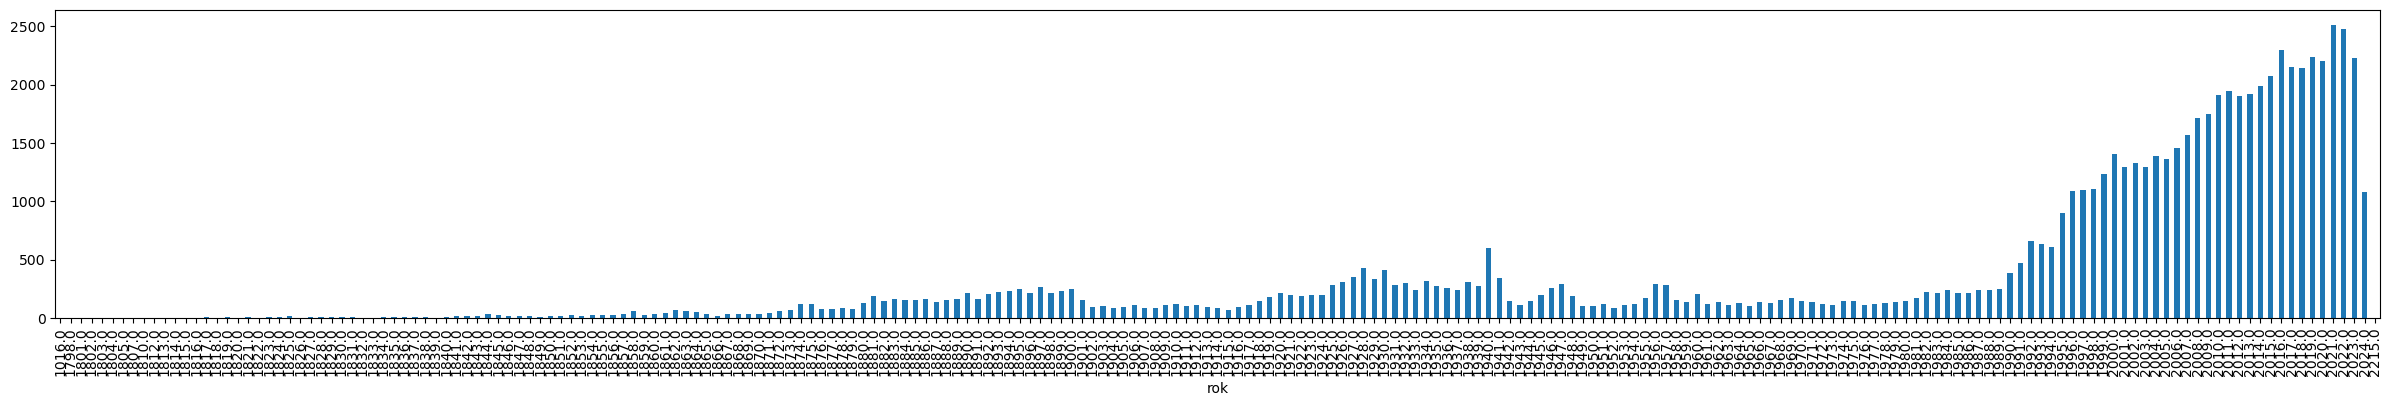

In [870]:
df.groupby('rok').size().plot.bar(figsize=(30,4))

In [872]:
df['stránek'] = df['300_a'].apply(lambda x: re.search(r'\d{1,4}', str(x)).group(0) if re.search(r'\d{1,4}', str(x)) else None)
df['stránek'] = pd.to_numeric(df['stránek'])

In [928]:
cetne_zanry = df.explode('080_a').groupby('080_a').size().nlargest(50).index.to_list()
cetnost = df.explode('080_a')
cetnost2 = cetnost[cetnost['080_a'].isin(cetne_zanry)]
stranky = cetnost2.groupby('080_a')['stránek'].median()
stranky.sort_values()

080_a
(086.76)             1.0
(086.7.053.2)        1.0
(086.7)08            1.0
(0.025.2)           12.0
(0.027.6)           28.0
(0:82-193)          46.0
885.0-1             70.0
82-93               70.0
821.162.3-1         71.0
(0:82-1)            71.0
(0:82-14)           77.0
821.162.3-1-051     81.0
821.162.3-34        81.0
(0:82-192)          85.5
(0:82-321.7)        90.0
821-93              91.0
(0:82-34)           93.0
(0:82-321.3)       103.0
(0:82-32)          111.0
821.162.3-32       118.0
(082)              121.0
885.0-32           128.0
(0:82-322.4)       128.0
(0:82-94)          135.0
(0:82-3)           138.0
821.162.3-3        141.0
(0:82-321.6)       144.0
(0:82-4)           145.0
(0:82-321.5)       149.0
(0:82-322.6)       154.5
(048.8)            158.0
821.162.3-051      158.5
(082.21)           160.0
(437.3)            173.0
929                173.0
(0:82-322.9)       185.0
821.162.3          195.0
(0:82-311.3)       203.0
(0:82-312.5)       206.0
(0:82-311.5)       

<Axes: xlabel='rok'>

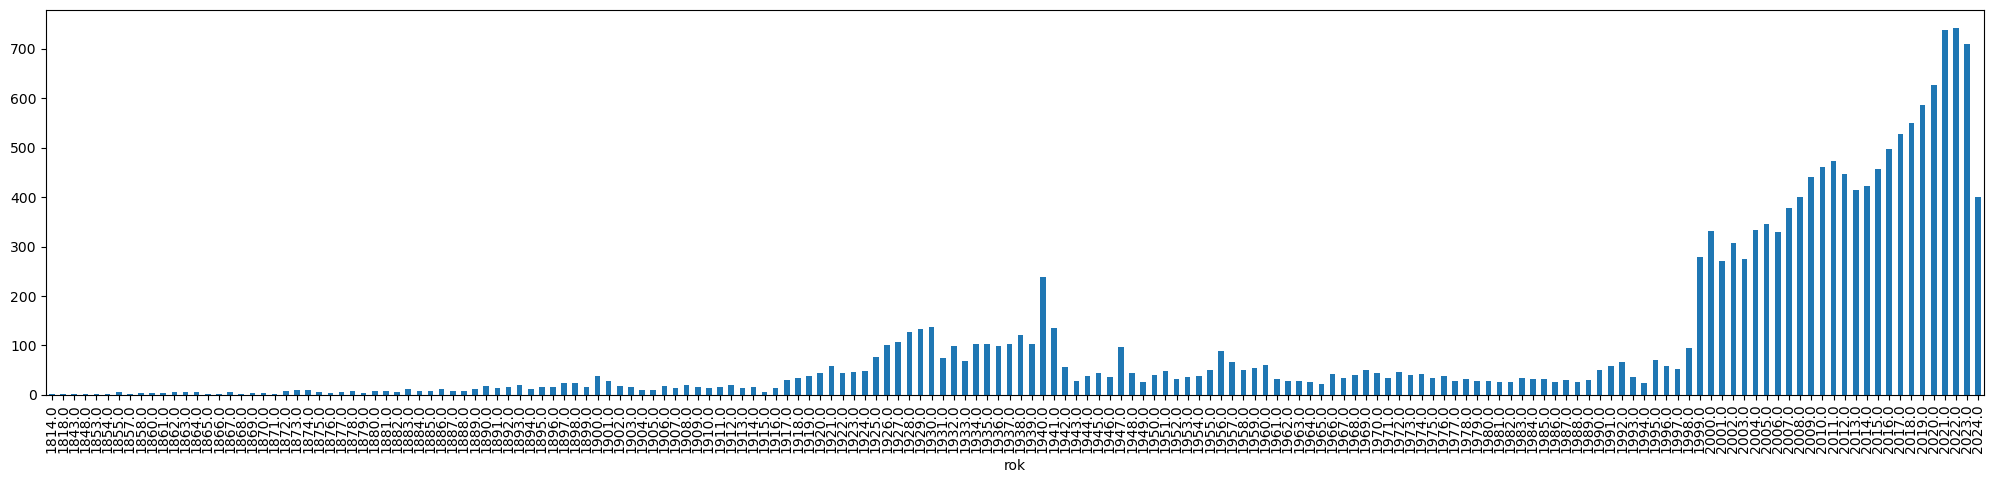

In [938]:
cetnost[cetnost['080_a'] == '821.162.3-31'].groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

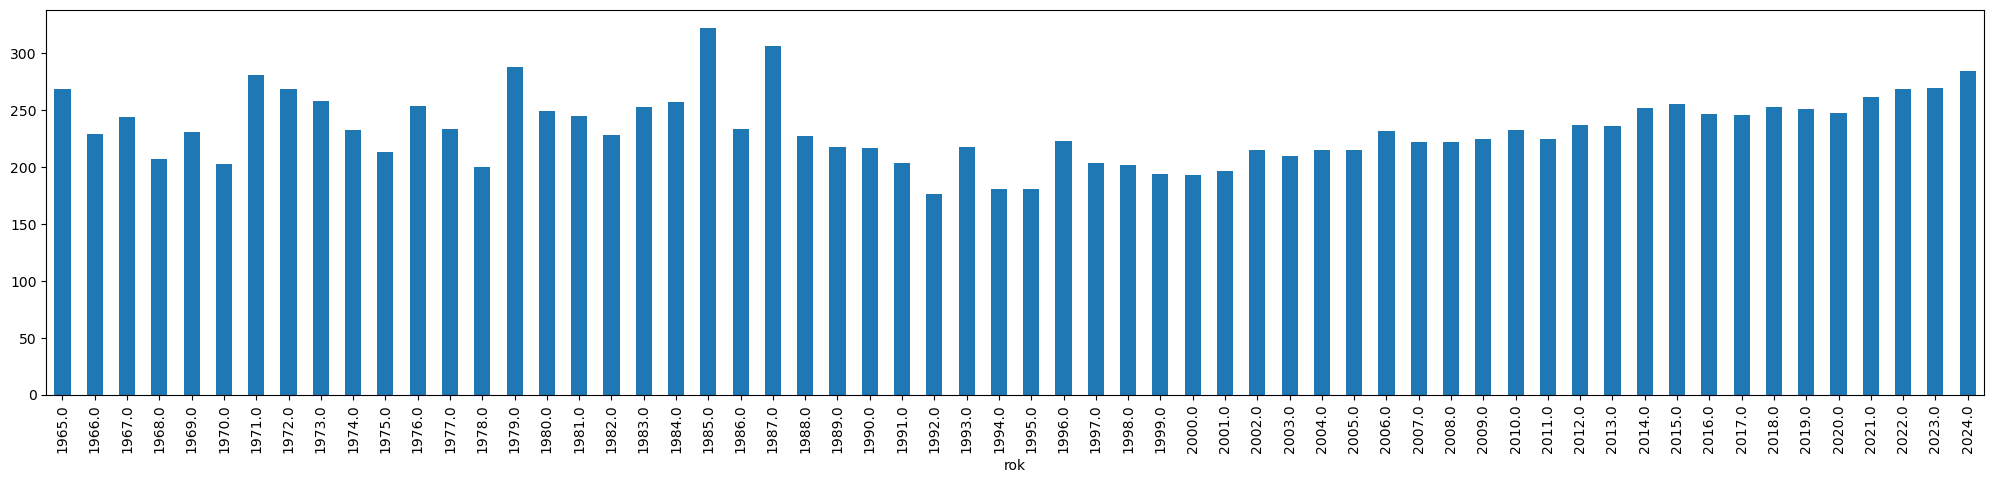

In [936]:
cetnost[cetnost['080_a'] == '821.162.3-31'].groupby('rok')['stránek'].median().tail(60).plot.bar(figsize=(25,5))

In [ ]:
cetnost[cetnost['080_a'] == '821.162.3-31'].groupby('rok')['stránek'].median().tail(60).plot.bar(figsize=(25,5))

<Axes: ylabel='Frequency'>

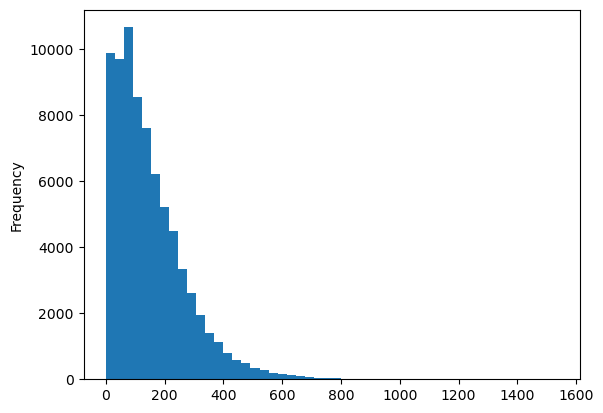

In [873]:
df['stránek'].plot.hist(bins=50)

In [874]:
df['072_x'].sample(20)

47178                                        [Česká próza]
41945        [Literatura (teorie), Bibliografie. Katalogy]
33080                                       [Česká poezie]
34964    [Česká próza, Literatura pro děti a mládež (be...
3983                                        [Česká poezie]
10959                                        [Česká próza]
3944                                        [Česká poezie]
74542    [Česká próza, Literatura pro děti a mládež (be...
46970                                       [Česká poezie]
15835                                        [Česká próza]
13692    [Česká próza, Literatura pro děti a mládež (be...
12216                                       [Česká poezie]
15515                                        [České drama]
27901                                        [Česká próza]
41550    [Česká próza, Literatura pro děti a mládež (be...
55284    [Česká próza, Literatura pro děti a mládež (be...
69017                                       [Česká poezi

In [875]:
df[df['080_a'] == '885.0-32']

,001,003,005,006,007,008,010_a,015_a,015_z,020_a,020_c,020_q,020_z,022_a,022_z,024_a,024_ind1,024_ind2,024_q,024_z,028_a,028_b,028_ind1,028_ind2,028_q,035_a,040_9,040_a,040_b,040_c,040_d,040_e,041_a,041_b,041_d,041_e,041_g,041_h,041_ind1,041_k,043_2,043_a,043_b,044_a,045_a,047_a,048_a,048_b,072_2,072_9,072_a,072_ind2,072_x,080_2,080_9,080_a,100_4,100_7,100_a,100_b,100_c,100_d,100_ind1,100_q,110_4,110_7,110_a,110_b,110_ind1,111_4,111_7,111_a,111_c,111_d,111_e,111_ind1,111_n,130_7,130_a,130_g,130_ind1,130_l,130_p,210_a,210_b,210_ind1,222_a,222_b,222_ind2,240_7,240_a,240_ind1,240_ind2,240_k,240_l,240_n,245_a,245_b,245_c,245_h,245_ind1,245_ind2,245_n,245_p,246_a,246_b,246_f,246_i,246_ind1,246_ind2,246_n,246_p,250_a,250_b,256_a,260_3,260_a,260_b,260_c,260_e,260_f,260_g,260_ind1,264_3,264_a,264_b,264_c,264_ind1,264_ind2,300_a,300_b,300_c,300_e,300_f,306_a,310_a,310_b,321_a,321_b,336_2,336_a,336_b,337_2,337_a,337_b,338_2,338_a,338_b,340_2,340_a,344_2,344_a,344_b,344_c,344_g,347_2,347_a,347_b,362_a,362_ind1,382_a,382_b,382_ind1,382_ind2,382_n,382_s,382_v,490_3,490_a,490_ind1,490_v,490_x,500_4,500_5,500_a,501_5,501_a,504_a,505_a,505_g,505_ind1,505_ind2,505_r,505_t,508_a,511_a,511_ind1,516_a,518_3,518_a,518_d,518_o,518_p,520_a,520_b,520_ind1,521_a,521_ind1,525_a,530_a,538_a,546_a,550_a,562_a,563_5,563_a,580_a,588_5,588_a,600_2,600_7,600_a,600_b,600_c,600_d,600_ind1,600_ind2,600_l,600_q,600_t,600_x,610_2,610_7,610_a,610_b,610_ind1,610_ind2,611_2,611_7,611_a,611_c,611_d,611_ind1,611_ind2,611_n,630_2,630_7,630_a,630_d,630_ind1,630_ind2,630_l,630_p,648_2,648_7,648_a,648_ind2,650_2,650_7,650_a,650_ind1,650_ind2,650_x,650_y,650_z,651_2,651_7,651_a,651_ind2,651_x,651_y,651_z,653_a,653_ind1,655_2,655_7,655_a,655_ind1,655_ind2,655_x,700_4,700_7,700_a,700_b,700_c,700_d,700_e,700_f,700_i,700_ind1,700_ind2,700_k,700_l,700_m,700_o,700_q,700_s,700_t,710_4,710_7,710_a,710_b,710_c,710_d,710_ind1,711_4,711_7,711_a,711_c,711_d,711_e,711_ind1,711_n,730_7,730_a,730_i,730_ind1,730_ind2,730_l,730_p,740_a,740_h,740_ind1,740_ind2,740_n,752_a,752_c,765_9,765_i,765_ind1,765_ind2,765_n,765_t,770_ind1,770_t,772_g,772_i,772_ind1,772_ind2,772_t,772_x,776_i,776_ind1,776_ind2,776_t,776_x,776_z,780_ind1,780_ind2,780_t,785_a,785_ind1,785_ind2,785_t,787_a,787_b,787_d,787_g,787_h,787_i,787_ind1,787_ind2,787_s,787_t,787_x,787_z,800_a,800_b,800_d,800_ind1,800_p,800_q,800_t,810_a,810_b,810_d,810_ind1,810_p,810_t,830_a,830_ind2,830_n,830_p,830_s,830_v,856_3,856_4,856_ind1,856_ind2,856_q,856_u,856_y,856_z,902_a,902_q,902_z,925_a,925_b,926_a,926_b,928_a,928_ind1,929_a,930_a,964_a,968_a,969_a,970_a,979_a,979_i,979_j,979_n,979_x,998_a,rok,stránek


In [876]:
vsechny_kody = df[['080_a','100_a','245_a']].explode('080_a')

In [877]:
vsechny_kody.groupby('080_a').size().nlargest(50)

080_a
821.162.3-32       22732
821.162.3-1        19491
821.162.3-31       17174
821-93             13055
(0:82-1)           12892
(0:82-32)          12812
(0:82-31)           6834
821.162.3-3         6812
821.162.3-34        4865
(0:82-3)            3921
(0:82-34)           3537
(437.3)             3145
885.0-1             3056
82-93               2762
929                 2715
(0:82-311.6)        2512
(082.21)            1986
(0:82-312.4)        1982
(0:82-322.4)        1954
(086.76)            1812
(0:82-321.5)        1477
(0:82-4)            1362
(0:82-322.6)        1323
(0.027.6)           1159
885.0-31            1128
885.0-32            1125
(0:82-312.9)        1100
(086.7)08            973
(0:82-321.6)         971
(0:82-193)           828
(086.7.053.2)        776
(0:82-14)            773
(0:82-311.9)         692
(0:82-94)            680
(082)                653
821.162.3-1-051      645
821.162.3-051        640
(0:82-311.5)         633
(0:82-312.6)         598
(048.8)            

In [878]:
df['072_x'].drop_duplicates().sample(50)

3747                       [Česká poezie, Filozofie ducha]
31584      [Sport. Hry. Tělesná cvičení, Česká literatura]
68793                  [Lingvistika. Jazyky, Česká poezie]
34819                              [Česká próza, Politika]
33336                         [Česká poezie, Czech poetry]
35290           [Německá literatura, německy psaná (o ní)]
17618              [Etika. Morální filozofie, Česká próza]
580      [Literatura pro děti a mládež (beletrie), Česk...
18920                            [Česká poezie, Malířství]
4398     [Liturgie. Křesťanské umění a symbolika. Ducho...
24254        [Německá poezie, německy psaná, Česká poezie]
25673                       [Česká poezie, Výtvarné umění]
68439    [Geografie Asie, reálie, cestování, Česká poezie]
15514                           [Zahrádkářství, Biografie]
27290    [Česká próza, Kuchařství. Potraviny. Vařená jí...
1922     [Česká próza, Zvláštní duševní stavy a procesy...
11253                                 [Česká próza, Práv

In [879]:
df['072_a'].drop_duplicates()

0                                  NaN
1                        [821.162.3-1]
14                       [821.162.3-3]
18               [821.162.3-3, 821-93]
23                       [821.162.3-2]
                     ...              
75442                [821.162.3-1, 73]
75943                      [821.162.4]
76162           [811.161, 821.162.3-3]
76251                    [792, 821-93]
76411    [741.52, 821.162.3-3, 821-93]
Name: 072_a, Length: 550, dtype: object

In [968]:
pokus = df.explode('245_a')

In [984]:
pokus[pokus['245_a'].str.contains('Miluji sv',na=False)]

,001,003,005,006,007,008,010_a,015_a,015_z,020_a,020_c,020_q,020_z,022_a,022_z,024_a,024_ind1,024_ind2,024_q,024_z,028_a,028_b,028_ind1,028_ind2,028_q,035_a,040_9,040_a,040_b,040_c,040_d,040_e,041_a,041_b,041_d,041_e,041_g,041_h,041_ind1,041_k,043_2,043_a,043_b,044_a,045_a,047_a,048_a,048_b,072_2,072_9,072_a,072_ind2,072_x,080_2,080_9,080_a,100_4,100_7,100_a,100_b,100_c,100_d,100_ind1,100_q,110_4,110_7,110_a,110_b,110_ind1,111_4,111_7,111_a,111_c,111_d,111_e,111_ind1,111_n,130_7,130_a,130_g,130_ind1,130_l,130_p,210_a,210_b,210_ind1,222_a,222_b,222_ind2,240_7,240_a,240_ind1,240_ind2,240_k,240_l,240_n,245_a,245_b,245_c,245_h,245_ind1,245_ind2,245_n,245_p,246_a,246_b,246_f,246_i,246_ind1,246_ind2,246_n,246_p,250_a,250_b,256_a,260_3,260_a,260_b,260_c,260_e,260_f,260_g,260_ind1,264_3,264_a,264_b,264_c,264_ind1,264_ind2,300_a,300_b,300_c,300_e,300_f,306_a,310_a,310_b,321_a,321_b,336_2,336_a,336_b,337_2,337_a,337_b,338_2,338_a,338_b,340_2,340_a,344_2,344_a,344_b,344_c,344_g,347_2,347_a,347_b,362_a,362_ind1,382_a,382_b,382_ind1,382_ind2,382_n,382_s,382_v,490_3,490_a,490_ind1,490_v,490_x,500_4,500_5,500_a,501_5,501_a,504_a,505_a,505_g,505_ind1,505_ind2,505_r,505_t,508_a,511_a,511_ind1,516_a,518_3,518_a,518_d,518_o,518_p,520_a,520_b,520_ind1,521_a,521_ind1,525_a,530_a,538_a,546_a,550_a,562_a,563_5,563_a,580_a,588_5,588_a,600_2,600_7,600_a,600_b,600_c,600_d,600_ind1,600_ind2,600_l,600_q,600_t,600_x,610_2,610_7,610_a,610_b,610_ind1,610_ind2,611_2,611_7,611_a,611_c,611_d,611_ind1,611_ind2,611_n,630_2,630_7,630_a,630_d,630_ind1,630_ind2,630_l,630_p,648_2,648_7,648_a,648_ind2,650_2,650_7,650_a,650_ind1,650_ind2,650_x,650_y,650_z,651_2,651_7,651_a,651_ind2,651_x,651_y,651_z,653_a,653_ind1,655_2,655_7,655_a,655_ind1,655_ind2,655_x,700_4,700_7,700_a,700_b,700_c,700_d,700_e,700_f,700_i,700_ind1,700_ind2,700_k,700_l,700_m,700_o,700_q,700_s,700_t,710_4,710_7,710_a,710_b,710_c,710_d,710_ind1,711_4,711_7,711_a,711_c,711_d,711_e,711_ind1,711_n,730_7,730_a,730_i,730_ind1,730_ind2,730_l,730_p,740_a,740_h,740_ind1,740_ind2,740_n,752_a,752_c,765_9,765_i,765_ind1,765_ind2,765_n,765_t,770_ind1,770_t,772_g,772_i,772_ind1,772_ind2,772_t,772_x,776_i,776_ind1,776_ind2,776_t,776_x,776_z,780_ind1,780_ind2,780_t,785_a,785_ind1,785_ind2,785_t,787_a,787_b,787_d,787_g,787_h,787_i,787_ind1,787_ind2,787_s,787_t,787_x,787_z,800_a,800_b,800_d,800_ind1,800_p,800_q,800_t,810_a,810_b,810_d,810_ind1,810_p,810_t,830_a,830_ind2,830_n,830_p,830_s,830_v,856_3,856_4,856_ind1,856_ind2,856_q,856_u,856_y,856_z,902_a,902_q,902_z,925_a,925_b,926_a,926_b,928_a,928_ind1,929_a,930_a,964_a,968_a,969_a,970_a,979_a,979_i,979_j,979_n,979_x,998_a,rok,stránek
59406,[nkc20182964539],[CZ PrNK],[20180208083907.0],NaN,[ta],[171129s2017 xr e 000 p cze d],NaN,[cnb002964539],NaN,[978-80-7272-966-1],NaN,[(brožováno)],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[(OCoLC)1022787454],NaN,[KLG001],[cze],NaN,[OLA001],[rda],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Konspekt],[25],[821.162.3-1],[7],[Česká poezie],"[MRF, MRF]",NaN,"[821.162.3-1, (0:82-1/-3)]",[aut],[pna2017973707],"[Macl, Ondřej,]",NaN,NaN,[1989-],[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miluji svou babičku víc než mladé dívky /,NaN,[Ondřej Macl],NaN,[1],[0],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[V Praze :],"[Dauphin,]",[2017],NaN,[1],[93 stran ;],NaN,[21 cm],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[rdacontent],[text],[txt],[rdamedia],[bez média],[n],[rdacarrier],[svazek],[nc],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Česká slova],[1],NaN,NaN,NaN,NaN,[300 výtisků],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [1012]:
vazby = df['020_q'].explode()
vazby.drop_duplicates().to_list()

['(Váz.) :',
 '(Váz. v kůži) :',
 nan,
 '(Brož.) :',
 '(Brož.)',
 '(Váz.)',
 '(Vázáno) :',
 '(Brožováno) :',
 '(Dvoulisty v přebalu) :',
 '(Brožováno)',
 '(Leporelo) :',
 '(Portfolio) :',
 '(Vázáno)',
 '(váz.) :',
 '(soubor ;',
 'váz.) :',
 '(1. díl ;',
 '(2. díl ;',
 '(brož.) :',
 '(váz.)',
 '(brož.)',
 '(váz. v kůži) :',
 '(váz. v plátně) :',
 '(v knize neuvedeno ;',
 'váz. v kůži)',
 '(plátno ;',
 '(kůže ;',
 'brož.)',
 'váz.)',
 '(soubor)',
 '(vázáno) :',
 '(volné dvoulisty v obálce) :',
 '(brožováno)',
 '(vyz.)',
 '(vázáno)',
 '(ASN repro ;',
 '(volné dvoulisty v přebalu)',
 '(brožováno) :',
 '(Akcent ;',
 'brožováno)',
 '(volné l.)',
 '(Jota ;',
 'brož.) :',
 '(Arca JiMfa ;',
 '(volné dvoulisty v přebalu) :',
 '(Laguna ;',
 '(Jindřich Petr ;',
 '(Erika. Praha ;',
 '(ALE ;',
 '(volné dvoulisty v obálce)',
 'vázáno)',
 '(Paseka ;',
 '(JOTA ;',
 '(kniha ;',
 '(omalovánky ;',
 '(Erika ;',
 '(Kentaur ;',
 '(Maťa ;',
 '(Brož)',
 'volné l. v přebalu)',
 '(Junácká edice. Praha ;',
 '(Pra

In [1030]:
romany_po_letech

,080_a,020_q,rok,245_a
0,[885.0-14(081)],[(Váz.) :],1983.0,[Medový kámen :]
1,"[908.437.10, 885.0-1]",[(Váz. v kůži) :],1982.0,[Pražský výběr /]
2,"[908.437.10, 885.0-1]",[(Váz. v kůži) :],1982.0,[Pražský výběr /]
4,[885.0-1],[(Brož.) :],1982.0,[Jak hovoří klavír :]
5,[885.0-13],[(Váz.) :],1982.0,[Pojď se mnou do noci :]
...,...,...,...,...
76428,"[821.162.3-31, (0:82-31)]",[(brožováno)],2024.0,[Narušení děje /]
76429,"[821.162.3-32, 070.421-055.2, 929, (437.3), (0...",[(vázáno) :],2024.0,[Samé dobré starosti /]
76430,"[821.162.3-32, 821-93, (0:82-32)]",[(vázáno) :],2024.0,[Zimní knížka pro Lucinku /]
76431,"[821.162.3-3, [070.42:654.195.6]-055.2, (437.3...",[(vázáno) :],2024.0,[Deník tlustý kočičandy /]


In [1056]:
romany_po_letech = df[['080_a','020_q','rok','245_a']].dropna()
print(len(romany_po_letech))
romany_po_letech = romany_po_letech.explode('020_q').explode('245_a').explode('080_a')
print(len(romany_po_letech))
romany_po_letech = romany_po_letech[(romany_po_letech['080_a'] == '821.162.3-31')] 
print(len(romany_po_letech))
romany_po_letech = romany_po_letech[((romany_po_letech['020_q'].str.contains('brožov',na=False)) | (romany_po_letech['020_q'].str.lower().str.contains('váz', na=False)))]
print(len(romany_po_letech))

66059
206911
16088
11972


<Axes: xlabel='rok'>

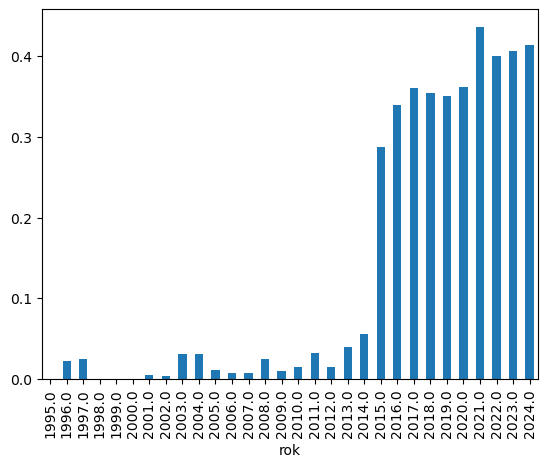

In [1068]:
(romany_po_letech[romany_po_letech['020_q'].str.lower().str.contains('brož', na=False)].groupby('rok').size() / romany_po_letech.groupby('rok').size()).tail(30).plot.bar()

In [1070]:
romany_po_letech[romany_po_letech['020_q'].str.lower().str.contains('brož', na=False)].groupby('rok').size() 

rok
1906.0      2
1927.0      2
1990.0      7
1991.0      3
1992.0      4
1993.0      6
1994.0      4
1996.0      1
1997.0      1
2001.0      1
2002.0      1
2003.0      7
2004.0      8
2005.0      3
2006.0      2
2007.0      2
2008.0      7
2009.0      3
2010.0      5
2011.0     11
2012.0      5
2013.0     11
2014.0     15
2015.0    121
2016.0    171
2017.0    180
2018.0    182
2019.0    189
2020.0    204
2021.0    293
2022.0    274
2023.0    262
2024.0    156
dtype: int64

In [1046]:
romany_po_letech

,rok,020_q


In [1004]:
pokus[pokus['245_a'].str.contains('Fosilie',na=False)].transpose().dropna()

,74209
001,[nkc20233549616]
003,[CZ PrNK]
005,[20231030122624.0]
007,[ta]
008,[230925s2023 xr g 000 f cze]
015_a,[cnb003549616]
020_a,[978-80-7637-400-3]
020_q,[(brožováno)]
035_a,[(OCoLC)1408815867]
040_a,[ABG001]


In [998]:
pokus[pokus['245_a'].str.contains('Fosilie',na=False)]['998_a'].astype(str).iloc[0]

"['http://aleph.nkp.cz/F/?func=direct&doc_number=003549616&local_base=CNB']"